In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка данных
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

# Разделение данных на признаки и целевую переменную
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

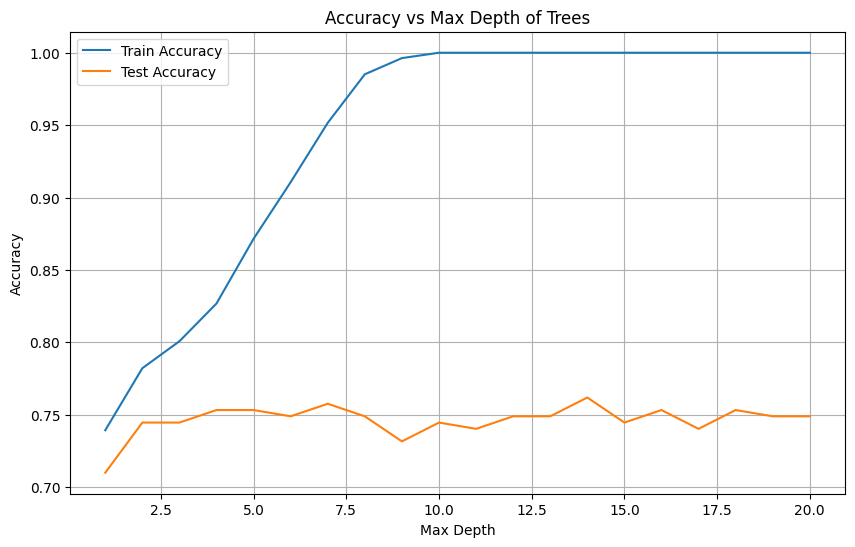

In [11]:
# Исследование зависимости качества от глубины деревьев
max_depths = range(1, 21)
train_acc = []
test_acc = []

for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_acc, label='Train Accuracy')
plt.plot(max_depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth of Trees')
plt.legend()
plt.grid()
plt.show()

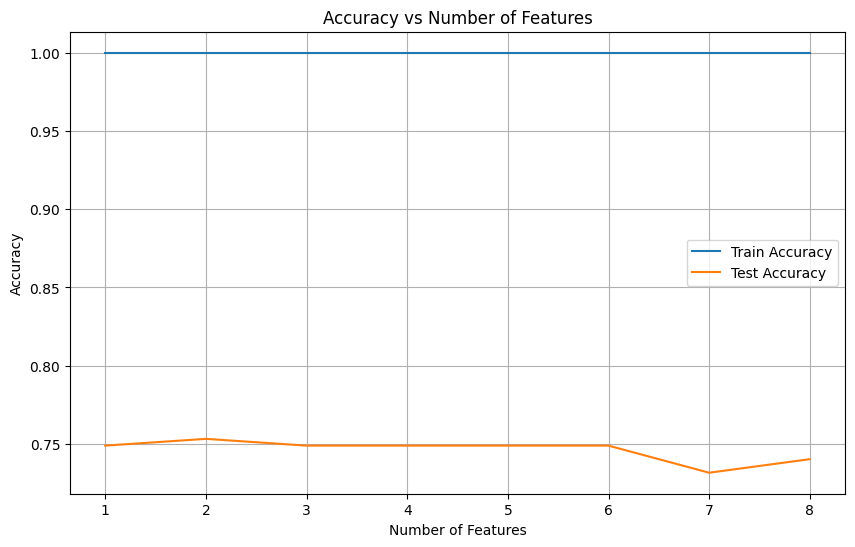

In [12]:
# Исследование зависимости качества от количества признаков
max_features = range(1, X.shape[1]+1)
train_acc = []
test_acc = []

for features in max_features:
    rf = RandomForestClassifier(max_features=features, random_state=42)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_features, train_acc, label='Train Accuracy')
plt.plot(max_features, test_acc, label='Test Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.xticks(max_features)
plt.legend()
plt.grid()
plt.show()

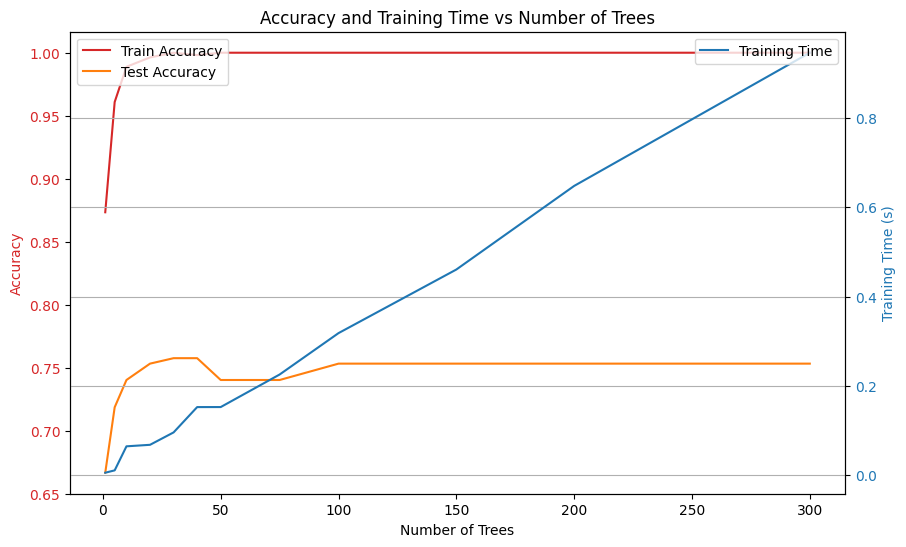

In [13]:
# Исследование зависимости качества от количества деревьев
n_estimators = [1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200, 300]
train_acc = []
test_acc = []
times = []

for n in n_estimators:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    times.append(time.time() - start_time)
    
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Построение графиков
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(n_estimators, train_acc, label='Train Accuracy', color='tab:red')
ax1.plot(n_estimators, test_acc, label='Test Accuracy', color='tab:orange')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Training Time (s)', color=color)
ax2.plot(n_estimators, times, label='Training Time', color='tab:blue')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Accuracy and Training Time vs Number of Trees')
plt.grid()
plt.show()

In [14]:
# Обучение базовой модели XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       151
           1       0.57      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231


Confusion Matrix:
[[110  41]
 [ 25  55]]


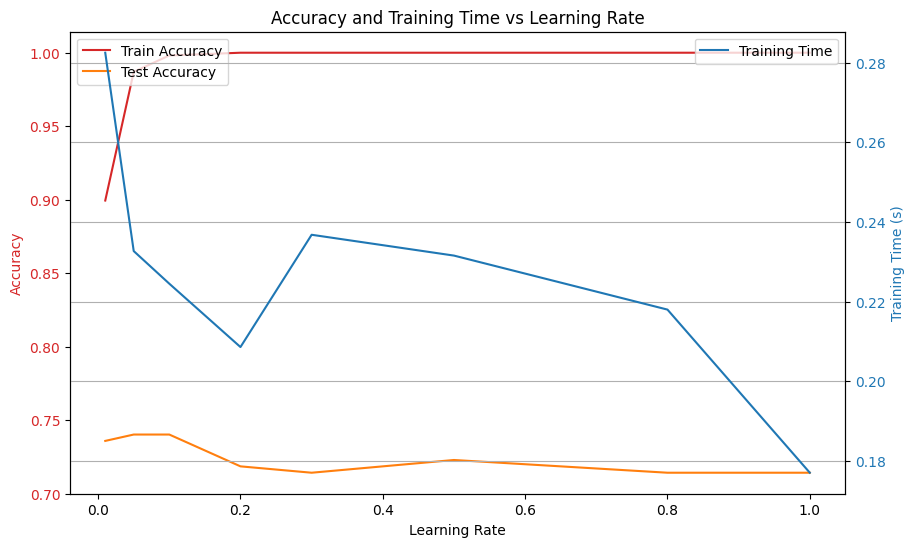

In [15]:
# Подбор гиперпараметров XGBoost
# Исследуем learning_rate
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
train_acc = []
test_acc = []
times = []

for lr in learning_rates:
    start_time = time.time()
    xgb = XGBClassifier(learning_rate=lr, random_state=42)
    xgb.fit(X_train, y_train)
    times.append(time.time() - start_time)
    
    train_pred = xgb.predict(X_train)
    test_pred = xgb.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Построение графиков
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(learning_rates, train_acc, label='Train Accuracy', color='tab:red')
ax1.plot(learning_rates, test_acc, label='Test Accuracy', color='tab:orange')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Training Time (s)', color=color)
ax2.plot(learning_rates, times, label='Training Time', color='tab:blue')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Accuracy and Training Time vs Learning Rate')
plt.grid()
plt.show()

In [16]:
# Подбор max_depth и n_estimators
xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    reg_alpha=0.1,
    reg_lambda=1.0,
    subsample=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("Optimized XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

print("\nOptimized XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       151
           1       0.62      0.69      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231


Optimized XGBoost Confusion Matrix:
[[118  33]
 [ 25  55]]


In [17]:
# Сравнение Random Forest и XGBoost
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

xgb_pred = xgb.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

Random Forest Accuracy: 0.7532467532467533
XGBoost Accuracy: 0.7489177489177489
